# Reproducing binned muon energy proxy reconstruction plot

In [1]:
from hierarchical_nu.detector.r2021 import R2021EnergyResolution
from hierarchical_nu.backend import DistributionMode
from icecube_tools.detector.r2021 import R2021IRF
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

2.0 2.5
2.5 3.0
3.0 3.5
3.5 4.0
4.0 4.5


(2.2, 3.5)

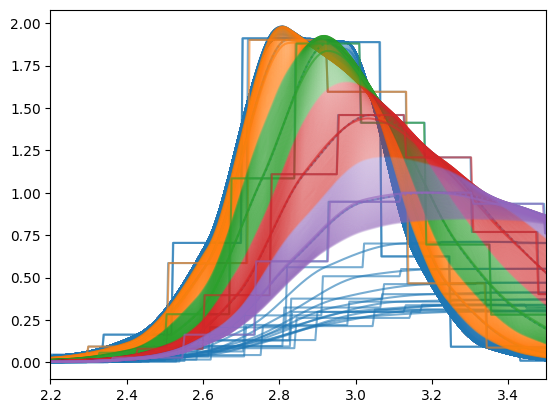

In [2]:
it = R2021IRF.from_period("IC86_II")
hnu = R2021EnergyResolution(DistributionMode.PDF)

dec = 15 * u.deg
dec_idx = 2
e_range = 14

for e in range(e_range):
    supp = it.reco_energy[e, dec_idx].support()
    x = np.linspace(*supp, 1_000)
    pdf = it.reco_energy[e, dec_idx].pdf(x)
    plt.plot(x, pdf, color="C0", alpha=0.6)
# it.reco_energy_bins[:, dec_idx]


x = np.linspace(1, 8, 1_000)
for tE in hnu.log_tE_binc:
    # Evaluated at true energy support
    plt.plot(x, np.exp(hnu._2dsplines[dec_idx](x, tE, grid=False)), color="C0", alpha=0.6)

x = np.linspace(1, 8, 1_000)
    # Evaluated at true energy support
for c, (tE, lE, hE) in enumerate(zip(hnu.log_tE_binc, hnu.log_tE_bin_edges[:-1], hnu.log_tE_bin_edges[1:])):
    plt.plot(x, np.exp(hnu._2dsplines[dec_idx](x, tE, grid=False)), color="C%s" % c, alpha=0.6, ls=":")
    print(lE, hE)
    tE = np.linspace(lE, hE, 200)
    tE_binc = tE[:-1] + np.diff(tE) / 2
    eres = (np.exp(hnu._2dsplines[dec_idx](x, tE_binc))).sum(axis=1) / tE_binc.size
    for logE in tE_binc:
        plt.plot(x, np.exp(hnu._2dsplines[dec_idx](x, logE, grid=False)), color="C%s" % c, alpha=0.1)
    plt.plot(x, eres, color="C%s" % c, alpha=0.6)
    supp = it.reco_energy[e, dec_idx].support()
    energy = np.linspace(*supp, 1_000)
    pdf = it.reco_energy[c, dec_idx].pdf(energy)
    plt.plot(energy, pdf, color="C%s" % c, alpha=0.6)
# it.reco_energy_bins[:, dec_idx]

    if c == 4:
        break

plt.xlim(2.2, 3.5)
